Name : Prasanna Gnanavel

Student Number : 190906922

Module : ECS766A - DATA MINING

**Assignment 1**

**Question 1**

1. Consider the following values for a feature: [2, 15, 20, 5, 1, 4, 7, 9, 10, 3, 14, 8]. Apply the following binning techniques:

      1. Equal-frequency binning 

      2. Equal-width binning 

In [1]:
import pandas as pd
a=[2, 15, 20, 5, 1, 4, 7, 9, 10, 3, 14, 8]
print ("Equal Frequency binnning using qcut")
bins = pd.qcut(a,3)
bins.value_counts()

Equal Frequency binnning using qcut


(0.999, 4.667]    4
(4.667, 9.333]    4
(9.333, 20.0]     4
dtype: int64

In [2]:
print("Equal-width binning using cut")
bins = pd.cut(a,3)
bins.value_counts()

Equal-width binning using cut


(0.981, 7.333]     6
(7.333, 13.667]    3
(13.667, 20.0]     3
dtype: int64

**Question 2**

2. Use each of the methods listed below to normalize the following values for a feature: [10, 20, 35, 70, 100]

    1. Scaling with a mininum at 0 and a maximum at 1 

    2. Standardization 

In [10]:
import numpy as np
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
    

sampledata= [10, 20, 35, 70, 100]
b=normalize(sampledata)
print("The Normalized value with a minimum at 0 and a maximum at 1")
print(b)


The Normalized value with a minimum at 0 and a maximum at 1
[0.         0.11111111 0.27777778 0.66666667 1.        ]


In [ ]:
def standardize(data):
    return (data - np.average(data)) / np.std(data)

sampledata= [10, 20, 35, 70, 100]
b=standardize(sampledata)
print("The standardisation values are ")
print(b)

The standardisation values are 
[-1.10756603 -0.80822386 -0.3592106   0.68848699  1.5865135 ]


**Question 3**

3. Suppose that a hospital has kept records of the age and BMI (Body Mass Index) of 16 randomly selected individuals. This data is presented below. Compute the correlation coefficient between the two features. Are the two features positively or negatively correlated?


Age	23	23	27	27	39	41	47	49	52	54	54	56	57	58	58	60


BMI	16	19	18	21	24	23	26	25	24	26	23	26	27	31	26	27

In [ ]:
import numpy as np
Age=np.array([23,23,27,27,39,41,47,49,52,54,54,56,57,58,58,60])
BMI=np.array([16,19,18,21,24,23,26,25,24,26,23,26,27,31,26,27])
r = np.corrcoef( Age,BMI)
print("The Age to BMI Correlation is " + str(r[0,1]) )
print("The Two features are postively correlated")

The Age to BMI Correlation is 0.8911082029151666
The Two features are postively correlated


**Question 5**

5. Load the CSV file "data/BL_books.csv", which includes records of books hosted at the British Library. Inspect the data and describe any data issues observed. Remove fields that refer to internal processes at the British Library and do not describe the books themselves (Corporate Author, Corporate Contributors, Issuance type, Former owner, Shelfmarks, Engraver). Clean data in the column Date of Publication in order to remove the extra dates in square brackets (e.g., 1879 [1878] -> 1879), and convert date ranges to their start date, wherever present (e.g., 1860-63 -> 1860).

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 500)
df = pd.read_csv('BL-books.csv')
df.head(2)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.


In [ ]:
df.shape
df1=df.drop(['Corporate Author', 'Corporate Contributors', 'Issuance type', 'Former owner', 'Shelfmarks', 'Engraver'],axis=1)
df1.shape
#df1.head(2)

(2880, 9)

In [ ]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
df1[df1.isnull().any(axis=1)]
#Total 7961 rows have null values out of 8287 rows

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Flickr URL
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",http://www.flickr.com/photos/britishlibrary/ta...
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",http://www.flickr.com/photos/britishlibrary/ta...
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",http://www.flickr.com/photos/britishlibrary/ta...
6,519,NaN,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.","ASHLEY, Florence Emily.",http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...,...,...,...
2875,1413820,NaN,London,1848,Longman & Co.,The History of the Decline and Fall of the Rom...,"Gibbon, Edward","SCHREITER, Carl Gottfried.",http://www.flickr.com/photos/britishlibrary/ta...
2876,1413823,[Another edition.] With notes by Dean Milman a...,London,1854-55,NaN,[The History of the Decline and Fall of the Ro...,"Gibbon, Edward","GUIZOT, François Pierre Guillaume.|Milman, He...",http://www.flickr.com/photos/britishlibrary/ta...
2877,1413828,NaN,London,"[1882, 85]","Ward, Lock & Co.",Gibbon's History of the Decline and Fall of th...,"Gibbon, Edward","BURY, John Bagnell.|Milman, Henry Hart",http://www.flickr.com/photos/britishlibrary/ta...
2878,1413858,NaN,London,1899-1901,John Murray,The Student's Gibbon ... Abridged from the ori...,"Gibbon, Edward","ANDERSON, John George Clark.|GREENIDGE, Abel H...",http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
#a= str(df1["Date of Publication"])
a=str(['1879 [1878]','1831, 32','1834-43'])
#print(a)
head, sep, tail = a.partition(',')
print(tail)
type(a)

 '1831, 32', '1834-43']


str

Summary

1. Total zero rows are duplicate records in the given dataset
2. Total 7961 rows have null values out of 8287 rows

**Question 6**

6. Load the CSV file "data/country-income.csv", which includes both numerical and categorical values. Perform data cleaning in order to replace any NaN values with the mean of the value for a given feature. Then replace any categorical labels with numerical labels. Display the resulting dataset. You can use the packages sklearn.impute and sklearn.preprocessing to assist you.

In [ ]:
CI = pd.read_csv('country-income.csv')
CI.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [ ]:
CI.shape
#find null values in the dataset
CI[CI.isnull().any(axis=1)]

,Region,Age,Income,Online Shopper
4,USA,45.0,NaN,Yes
6,Brazil,NaN,62400.0,No


In [ ]:
#Replace the null values with mean
CI_updated=CI.fillna(CI.mean())
CI_updated.head(10)

,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


In [ ]:
CI_updated.dtypes

Region             object
Age               float64
Income            float64
Online Shopper     object
dtype: object

In [ ]:
CI_updated["Region"].value_counts()

India     4
USA       3
Brazil    3
Name: Region, dtype: int64

In [ ]:
CI_updated["Online Shopper"].value_counts()

No     5
Yes    5
Name: Online Shopper, dtype: int64

In [ ]:
cleanup_nums = {"Region": {"India": 1, "USA": 2 ,"Brazil": 3},
                "Online Shopper": {"No": 1, "Yes": 2 }}

In [ ]:
CI_updated2=CI_updated.replace(cleanup_nums)

CI_updated2.head(10)

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,1
1,3,32.000000,57600.000000,2
2,2,35.000000,64800.000000,1
3,3,43.000000,73200.000000,1
4,2,45.000000,76533.333333,2
5,1,40.000000,69600.000000,2
6,3,43.777778,62400.000000,1
7,1,53.000000,94800.000000,2
8,2,55.000000,99600.000000,1
9,1,42.000000,80400.000000,2


Summary

Please find the summary of above dataset

  1. The null values are replaced by mean value

  2.Replaced categorical labels with numerical labels


**Question 7**

7. Load the CSV file "data/shoesize.csv", which includes measurements of shoe size and height (in inches) for 408 subjects, both female and male. Create scatterplots of shoe size versus height separately for female and male subjects. Compute the correlation coefficient between shoe size and height separately for female and male subjects. What can be inferred from the scatterplots and the correlation coefficients? You can implement your own formulation of the correlation coefficient or use the method DataFrame.corr to assist you.

In [ ]:
sz=pd.read_csv('shoesize.csv')
sz.head(2)
#sz.shape

,Index,Gender,Size,Height
0,1,F,5.5,60.0
1,2,F,6.0,60.0


In [ ]:
sz.dtypes

Index       int64
Gender     object
Size      float64
Height    float64
dtype: object

In [ ]:
corrmat = sz.corr()
round(corrmat,2)

,Index,Size,Height
Index,1.00,0.90,0.95
Size,0.90,1.00,0.87
Height,0.95,0.87,1.00


In [ ]:
corrmat = sz.loc[sz['Gender'] == 'M'].corr()
round(corrmat,2)

,Index,Size,Height
Index,1.00,0.79,0.96
Size,0.79,1.00,0.77
Height,0.96,0.77,1.00


In [ ]:
corrmat = sz.loc[sz['Gender'] == 'F'].corr()
round(corrmat,2)

,Index,Size,Height
Index,1.00,0.77,0.97
Size,0.77,1.00,0.71
Height,0.97,0.71,1.00


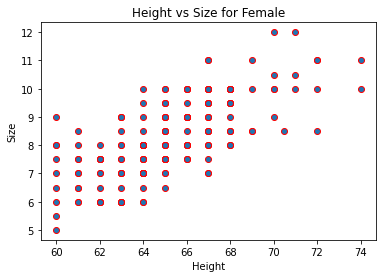

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter( sz.loc[sz['Gender'] == 'F']['Height'],sz.loc[sz['Gender'] == 'F']['Size'], edgecolors='r')
plt.xlabel('Height')
plt.ylabel('Size')
plt.title("Height vs Size for Female")
plt.show()

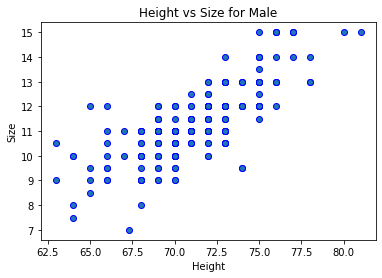

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter( sz.loc[sz['Gender'] == 'M']['Height'],sz.loc[sz['Gender'] == 'M']['Size'], edgecolors='b')
plt.xlabel('Height')
plt.ylabel('Size')
plt.title("Height vs Size for Male")
plt.show()


Summary

The following points are inferred from the scatter plot and correleation matrix

1. The height and shoe size have postive correleation

2. The height and shoe size have 0.77 correlation factor for Male

3. The height and shoe size have 0.71 correlation factor for Female